# Pymaceuticals Inc.

---

# Analysis

In [75]:
%matplotlib Widget

In [12]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Data paths
mouse_data_path = "data/Mouse_metadata.csv"
study_data_path = "data/Study_results.csv"

# Read csv files
mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_data_path)

# Merge data
complete_data = pd.merge(study_data, mouse_data,on="Mouse ID", how="left")
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Number of mice
complete_data["Mouse ID"].nunique()

249

In [14]:
# Identify Mouse ID of duplicate Mouse ID and Timpepoint combinations
duplicate_mice = complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"], keep= False)]
duplicate_mice = pd.unique(duplicate_mice["Mouse ID"])
duplicate_mice

array(['g989'], dtype=object)

In [15]:
# Duplicate Mice data
duplicate_mice_data = complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"], keep= False)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Clean data without duplicate mice
clean_complete_data = complete_data[complete_data["Mouse ID"] != "g989"]
clean_complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Confirm number of mice
clean_complete_data["Mouse ID"].nunique()

248

## Summary Statistics

In [18]:
# Calculate statistics: Mean, Median, Variance, Standard Deviation and SEM.
Mean_Tumor_Volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].median()
Variance_Tumor_Volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].var()
Std_Dev_Tumor_Volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].std()
SEM_Tumor_Volume = clean_complete_data.groupby("Drug Regimen", observed = False)["Tumor Volume (mm3)"].sem()

# Summary of statistics 
Statistics_Summary = pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_Volume, "Median Tumor Volume": Median_Tumor_Volume,
                    "Tumor Volume Variance": Variance_Tumor_Volume, "Tumor Volume Std. Dev.": Std_Dev_Tumor_Volume,
                    "Tumor Volume Std. Err.": SEM_Tumor_Volume})

#Display Summary
Statistics_Summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Define Statistics
Statisticts = {"Tumor Volume (mm3)":["mean","median","var","std","sem"]}

# Groups by Drug Regime and apply the statistics aggregation
Statistics_Summary2 = clean_complete_data.groupby("Drug Regimen").agg(Statisticts)

# Columns names
Statistics_Summary2.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics
Statistics_Summary2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

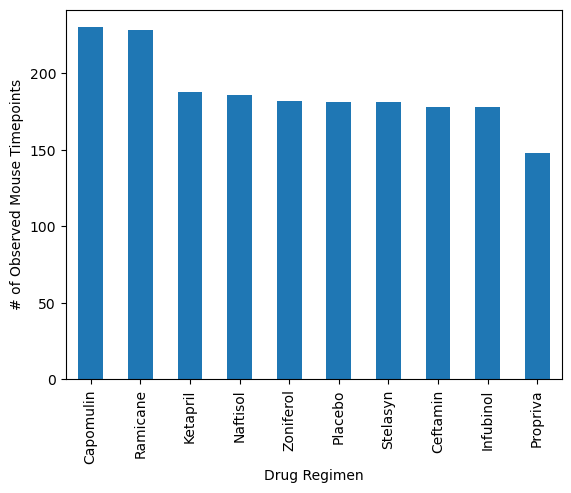

In [25]:


bar_df = clean_complete_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending= False)
bar_df.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")



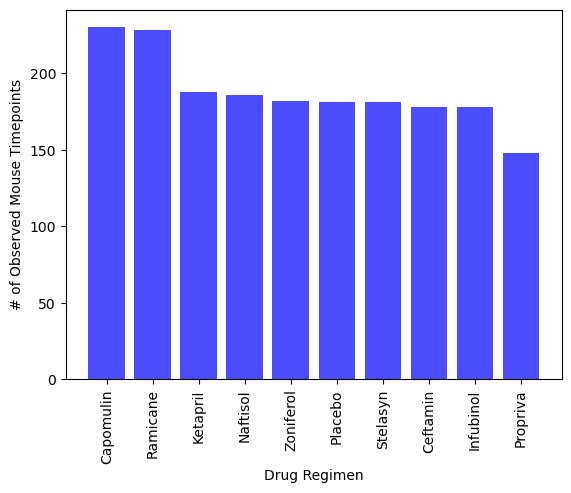

In [32]:
bar_df = clean_complete_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending= False)
bar_df = bar_df.reset_index()
plt.bar(bar_df["Drug Regimen"],bar_df["Mouse ID"], color="b", alpha=0.7, align="center",)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout
plt.show()